## Data wrangling stage for Capstone Two: 

### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy import stats

### Load the dataset

The dataset pertains to direct marketing campaigns carried out by a Portuguese banking institution. These campaigns involved making phone calls, often requiring multiple contacts with the same client to determine whether they would subscribe to a bank term deposit ('yes') or not ('no').

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')

This dataset comprises 45,211 instances, each corresponding to an established customer contacted by the bank through telephone conversations.

For every instance, the dataset documents 16 input variables encompassing a mix of qualitative and quantitative customer attributes. These attributes include factors like age, occupation, housing and personal loan status, account balance, and contact frequency.

Additionally, the dataset includes a sole binary output variable indicating outcomes of the phone interactions, specifically whether the customer responded with "yes" or "no."

In [3]:
data.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Check data types

As a next step in data wrangling, checking and correcting data types play a pivotal role in setting a solid foundation for analysis. This correction process includes converting columns to their suitable formats, ensuring numbers are recognized as numbers, categories are identified as categories, and dates are accurately interpreted.

In [6]:
# data types of columns
print(data_types)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [7]:
# columns to convert to categorical
columns_to_convert = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                      'contact', 'month','poutcome', 'y']

# columns to categorical data type
data[columns_to_convert] = data[columns_to_convert].astype('category')

In [8]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

### Handle missing values (if any)

The dataset is free of any missing values. However, it does contain entries such as "unknown" and "others" that are functionally similar to missing values. Consequently, these indeterminate values are eliminated from the dataset.

In [9]:
# missing values in each column
missing_values_count = data.isnull().sum()

# count of missing values for each column
print(missing_values_count)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
data['job'].unique()

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

In [11]:
# categorical columns to check unique values
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'poutcome', 'y']

# unique values in each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'job': ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
Unique values in 'marital': ['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
Unique values in 'education': ['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']
Unique values in 'default': ['no', 'yes']
Categories (2, object): ['no', 'yes']
Unique values in 'housing': ['yes', 'no']
Categories (2, object): ['no', 'yes']
Unique values in 'loan': ['no', 'yes']
Categories (2, object): ['no', 'yes']
Unique values in 'contact': ['unknown', 'cellular', 'telephone']
Categories (3, object): ['cellular', 'telephone', 'unknown']
Unique values in 'month': ['may', 'jun', 'jul', 'aug',

We are replacing occurrences of 'unknown' with 'other' in the 'job', 'education', 'contact', and 'poutcome' variables because dropping them would result in a significant loss of data.

In [12]:
# columns to replace values in
columns_to_replace = ['job', 'education', 'contact','poutcome']

# replace 'unknown' with 'other' in specified columns
data[columns_to_replace] = data[columns_to_replace].replace('unknown', 'other')

In [13]:
# checking if df has any 'unknown' values
has_unknown_values = (data == 'unknown').any().any()

if has_unknown_values:
    print("DataFrame has 'unknown' values.")
else:
    print("DataFrame does not have 'unknown' values.")

DataFrame does not have 'unknown' values.


### Treating outliers

Due to outliers in the 'balance' variable, representing extreme financial values, we've opted to remove these outliers from the dataset. This decision is aimed at enhancing the accuracy of our analysis by focusing on more typical data points and mitigating potential distortions caused by these extreme values.

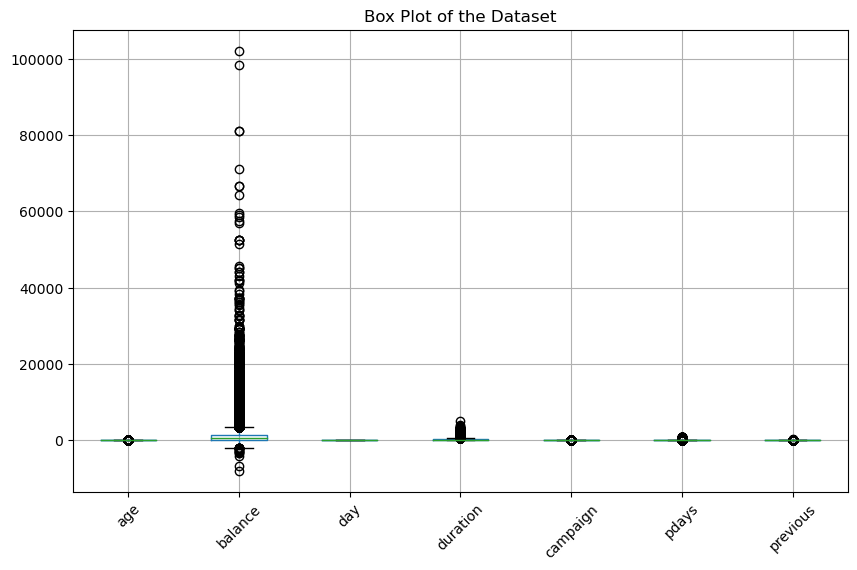

In [14]:
# outliers using a box plot
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title("Box Plot of the Dataset")
plt.xticks(rotation=45)
plt.show()

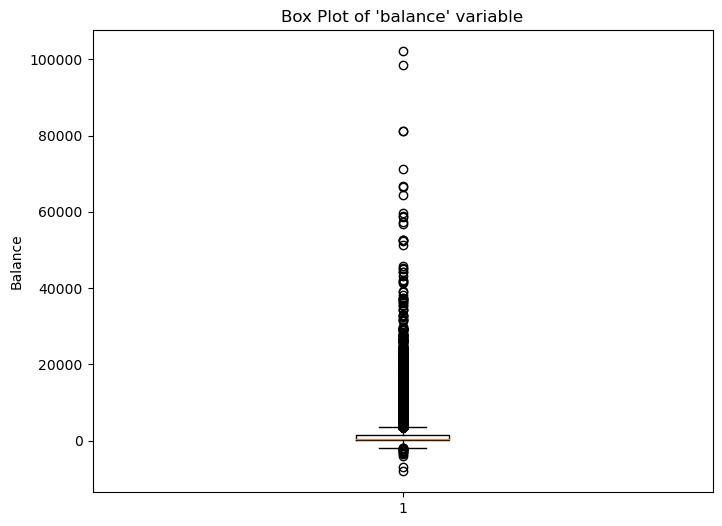

In [15]:
# box plot for the 'balance' variable
plt.figure(figsize=(8, 6))
plt.boxplot(data['balance'])
plt.title("Box Plot of 'balance' variable")
plt.ylabel("Balance")
plt.show()

In [16]:
data.shape

(45211, 17)

### Convert '-1' to '999' to indicate "client was not previously contacted"

In [17]:
# Convert -1 to 999 in 'pdays' variable
data.loc[data['pdays'] == -1, 'pdays'] = 999

print(data['pdays'])

0        999
1        999
2        999
3        999
4        999
        ... 
45206    999
45207    999
45208    184
45209    999
45210    188
Name: pdays, Length: 45211, dtype: int64


In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,999,0,other,no
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,999,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,999,0,other,no
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,999,0,other,no
4,33,other,single,other,no,1,no,no,other,5,may,198,1,999,0,other,no


In [19]:
data['y'].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

### Convert 'yes/no' to '1/0'

In [20]:
data['target'] = 1*(data['y'] == 'yes')

In [21]:
data.groupby('job').mean()[['target']]

,target
job,
admin.,0.122027
blue-collar,0.072750
entrepreneur,0.082717
housemaid,0.087903
management,0.137556
retired,0.227915
self-employed,0.118429
services,0.088830
student,0.286780


In [23]:
data['target'] = data['target'].astype('category')

In [24]:
data = data.drop(columns=['y'])

In [25]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,999,0,other,0
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,999,0,other,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,999,0,other,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,999,0,other,0
4,33,other,single,other,no,1,no,no,other,5,may,198,1,999,0,other,0


### Save the cleaned data as new data frame

In [26]:
data_bank = pd.DataFrame(data)

In [27]:
data_bank = data.copy() 
data_bank.to_csv('data_bank.csv', index=False) 

In [28]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,999,0,other,0
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,999,0,other,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,999,0,other,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,999,0,other,0
4,33,other,single,other,no,1,no,no,other,5,may,198,1,999,0,other,0
